# Лабораторная работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 1381 Ковалёв Павел Андреевич и Богданов Егор Михайлович.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Основные теоретические положения

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

## Выполнение работы

### Задание 1
Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

#### Вывод
Входной сигнал: s(t). Выходной сигнал y(t)=A+Bt. Сглаживание прямой по 2m+1 точке $F(A,B)= \sum_{k=-m}^{k=m}{(s_k-y_k)^2}$

МНК:
$$ 
\begin{cases}
 \frac{\partial F(A,B) }{\partial A}=0 \\
 \frac{\partial F(A,B)}{\partial B}=0
\end{cases} 
$$
$$
\begin{cases}
 \sum_{k=-m}^{k=m}{2(A+Bt-s_k)}=0 \\
 \sum_{k=-m}^{k=m}{(-2t(-A-Bt+s_k))}=0
\end{cases} 
$$
$$
\begin{cases}
 A=\frac{\sum_{k=-m}^{k=m}{s_k}}{2m+1}\\
 B=\frac{\sum_{k=-m}^{k=m}{s_k*k}}{\sum_{k=-m}^{k=m}{k^2}}
\end{cases} 
$$
Найдём "сглаженное" значение в точке $y_n$(т.е. t=0):
$$y_n=A+B*0=A=\frac{\sum_{k=-m}^{k=m}{s_k}}{2m+1}$$
Если $$s_n=e^{i \omega n}$$ 
то $$ y_n=\frac{e^{i \omega (n-m)} +\text{...}+e^{i \omega n}+\text{...}+e^{i \omega (n+m)}}{2m+1}= \frac{e^{-i \omega m}+\text{...}+1+\text{...}+e^{i \omega m}}{2m+1}*e^{i \omega n}=H(\omega)e^{i \omega n}$$
Используя равенство $e^{i\omega}+e^{-i\omega}=2cos(\omega)$ получим
$$H(\omega)=\frac{e^{-i \omega m}+\text{...}+1+\text{...}+e^{i \omega m}}{2m+1}=\frac{1+2cos(\omega)+\text{...}+2cos(m\omega)}{2m+1}$$
Далее используя $\omega=2\pi f$ получаем $\tilde{H}(f)=\frac{1+2cos(2\pi f)+\text{...}+2cos(2m\pi f)}{2m+1}$

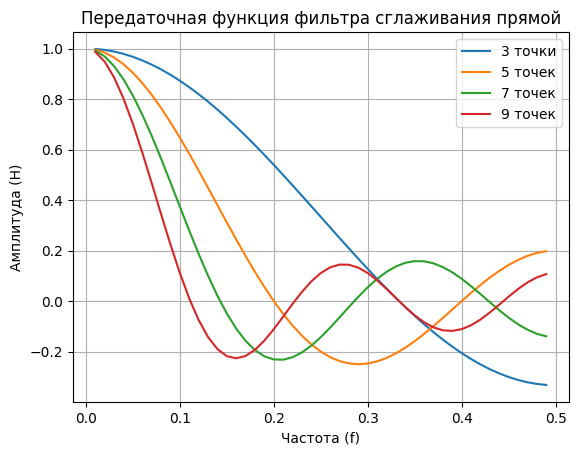

In [9]:
import matplotlib.pyplot as plt
import math

def H(f, k):
    m = k // 2
    h = 1
    for i in range(1, m + 1):
        h += 2 * math.cos(2 * math.pi * f * i) 
    return h / k

X = []
Y = []
X1 = []
Y1 = []
X2 = []
Y2 = []
X3 = []
Y3 = []
for i in range(1, 50):
    X.append(i / 100)
    Y.append(H(i / 100, 3))
    
    X1.append(i / 100)
    Y1.append(H(i / 100, 5))

    X2.append(i / 100)
    Y2.append(H(i / 100, 7))

    X3.append(i / 100)
    Y3.append(H(i / 100, 9))

plt.plot(X, Y, label="3 точки")
plt.plot(X1, Y1, label="5 точек")
plt.plot(X2, Y2, label="7 точек")
plt.plot(X3, Y3, label="9 точек")

plt.title("Передаточная функция фильтра сглаживания прямой")
plt.xlabel("Частота (f)")
plt.ylabel("Амплитуда (H)")
plt.legend()
plt.grid(True)
plt.show()


#### Интерпретация частотных свойств передаточных функций
Чем больше используется точек, тем эффективнее пропускаются низкие частоты и тем сильнее подавляются высокие

## Выводы


